In [7]:
import io 
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [8]:
# -*- coding: utf-8 -*-
url = "https://data.humdata.org/dataset/7b9c2851-dc37-4a88-9dcb-62e55eb91baf/resource/df6bfc55-3b25-4309-a1b4-74afba434956/download/kenya-health-facilities-2017_08_02.xlsx"

mydata = requests.get(url)


    Code                              Name Registration_number Keph level  \
0  22998               Kaka Medical Clinic                 NaN    Level 2   
1  22985                KOPANGA DISPENSARY                 NaN    Level 2   
2  22977           Fairview Medical Centre                 NaN    Level 2   
3  22976  RADIANT GROUP OF HOSPITALS-UMOJA                 NaN    Level 3   
4  22971             Songot Medical Clinic                 NaN    Level 2   

                              Facility type  \
0  Dispensaries and clinic-out patient only   
1        Basic primary health care facility   
2                  Secondary care hospitals   
3                  Secondary care hospitals   
4        Basic primary health care facility   

                                   Owner  \
0  Private Practice - Medical Specialist   
1                     Ministry of Health   
2         Private Practice - Unspecified   
3         Private Practice - Unspecified   
4   Private Practice - Nurse / Mid

In [ ]:

# Download the Excel file
with open("kenya_health_facilities.xlsx", "wb") as f:
    f.write(mydata.content)


# Load the Excel file into a DataFrame
dfa = pd.read_excel("kenya_health_facilities.xlsx")


In [ ]:
# read the data from the url
df = pd.read_excel(io.BytesIO(mydata.content))

# Display the first few rows of the DataFrame
print(df.head())

In [4]:
# data summary    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  8932 non-null   int64  
 1   Name                  8932 non-null   object 
 2   Registration_number   119 non-null    object 
 3   Keph level            8920 non-null   object 
 4   Facility type         8932 non-null   object 
 5   Owner                 8932 non-null   object 
 6   Regulatory body       8604 non-null   object 
 7   Beds                  8932 non-null   int64  
 8   Cots                  8932 non-null   int64  
 9   County                8932 non-null   object 
 10  Constituency          8932 non-null   object 
 11  Sub county            8932 non-null   object 
 12  Ward                  8932 non-null   object 
 13  Operation status      8932 non-null   object 
 14  Open_whole_day        8932 non-null   object 
 15  Open_public_holidays 

In [2]:
# display size of the dataframe
df.shape

(8932, 22)

In [3]:
# display the columns
df.columns

Index(['Code', 'Name', 'Registration_number', 'Keph level', 'Facility type',
       'Owner', 'Regulatory body', 'Beds', 'Cots', 'County', 'Constituency',
       'Sub county', 'Ward', 'Operation status', 'Open_whole_day',
       'Open_public_holidays', 'Open_weekends', 'Open_late_night',
       'Service_names', 'Approved', 'Public visible', 'Closed'],
      dtype='object')

In [4]:
# display count of missing values
df.isnull().sum()

Code                       0
Name                       0
Registration_number     8813
Keph level                12
Facility type              0
Owner                      0
Regulatory body          328
Beds                       0
Cots                       0
County                     0
Constituency               0
Sub county                 0
Ward                       0
Operation status           0
Open_whole_day             0
Open_public_holidays       0
Open_weekends              0
Open_late_night            0
Service_names           8932
Approved                   0
Public visible             0
Closed                     0
dtype: int64

In [9]:
# Check correlation of 'SalePrice' with others features using DataFrame.corr()
numericFeatures = df.select_dtypes(include=[np.number])
feature_corr = numericFeatures.corr()

In [10]:
# return correlation of 'Beds' with other features from 'feature_corr' and sort  in descending order
bed_corr = feature_corr['Beds'].sort_values(ascending=False)
print("Correlation of 'Beds' with other numeric features in descending order:")
print(bed_corr)

Correlation of 'beds' with other numeric features in descending order:
Beds             1.000000
Cots             0.745162
Code            -0.100032
Service_names         NaN
Name: Beds, dtype: float64


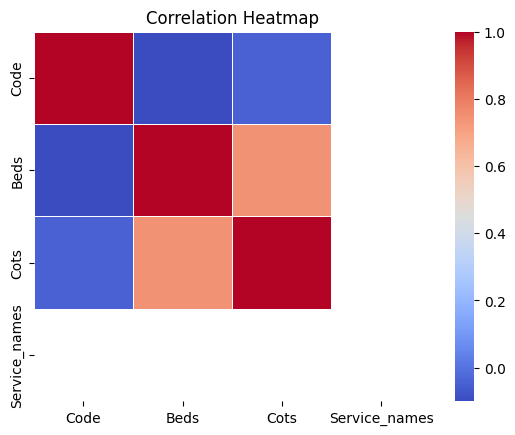

In [11]:
# Using Seaborn library, generate a heatmap based on 'feature_corr' from the previous cell
sns.heatmap(feature_corr, cmap='coolwarm', annot=False, fmt=".1f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


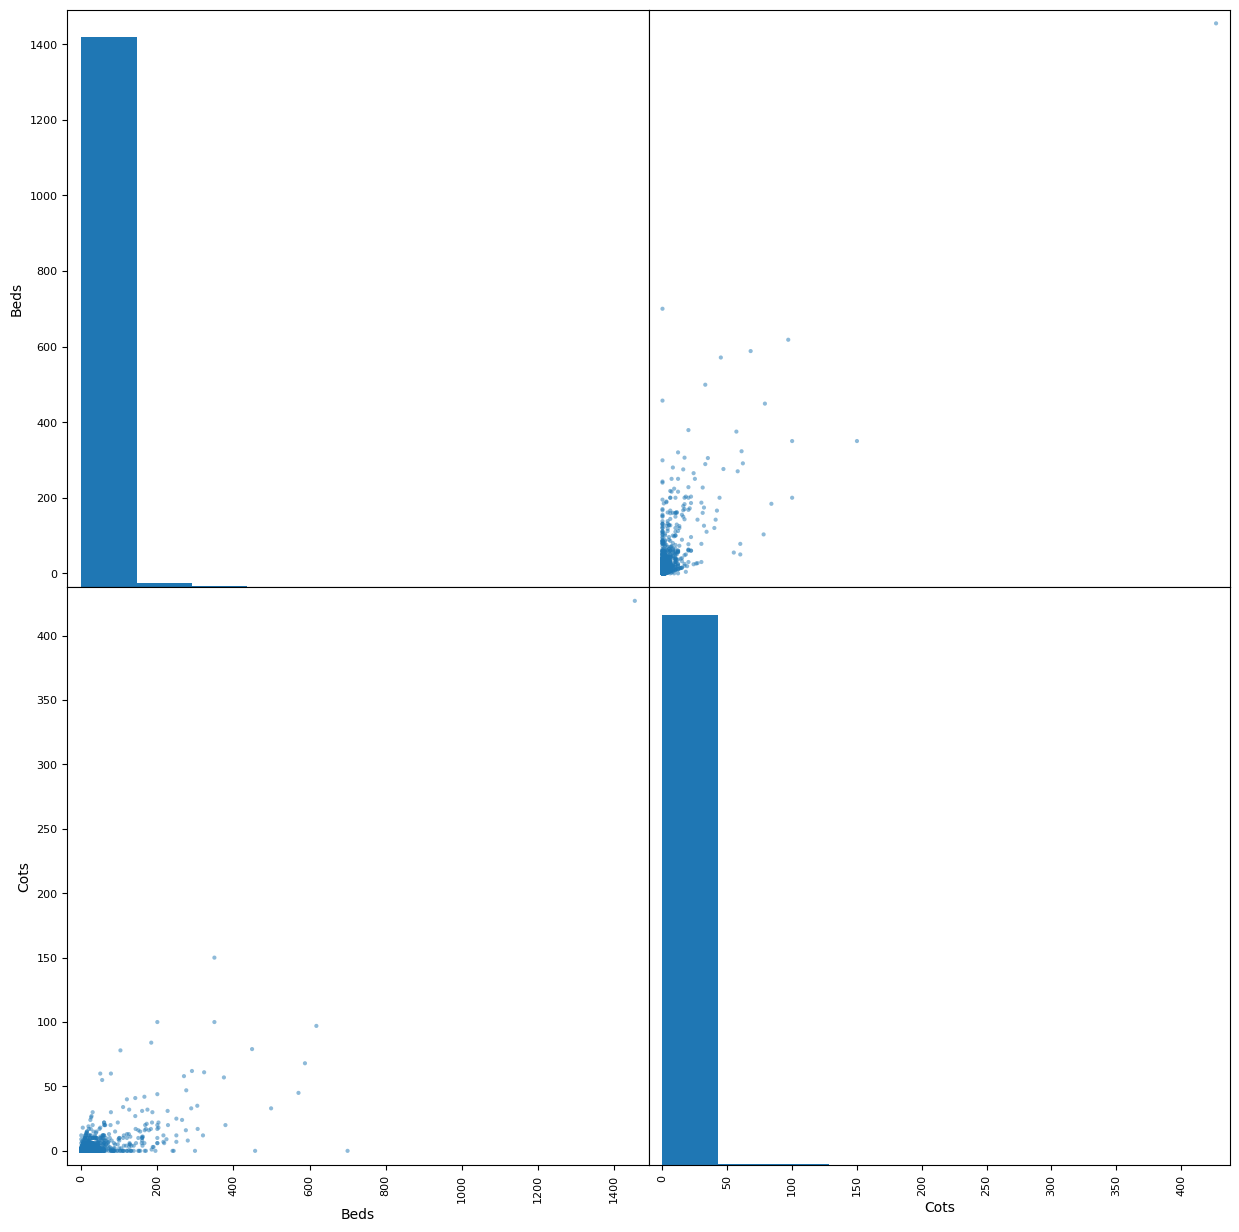

In [12]:
# Plot scatterplots to visualize correlations of few selected features 
scatter_features = ['Beds', 'Cots']


# Then, plot the scatter matrix using pd.plotting.scatter_matrix() function
pd.plotting.scatter_matrix(df[scatter_features], figsize=(15, 15))
plt.show()

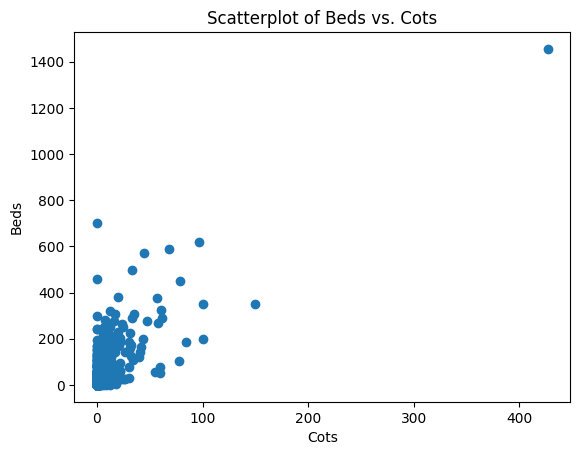

In [13]:
# Plot a scatterplot of Beds and Cots
plt.scatter(df['Cots'], df['Beds'])
plt.title('Scatterplot of Beds vs. Cots')
plt.xlabel('Cots')
plt.ylabel('Beds')
plt.show()